In [260]:
#https://stackoverflow.com/questions/47330244/generating-random-transition-probability-matrix-python
#https://docs.python.org/3/library/random.html
#ref: https://www.datacamp.com/tutorial/markov-chains-python-tutorial

In [261]:
from Transition import Transition

[[0.49834561 0.19917764 0.30247675]
 [0.16162447 0.44453946 0.39383607]
 [0.50291981 0.1419363  0.3551439 ]]
[[0.49834561 0.19917764 0.30247675]
 [0.16162447 0.44453946 0.39383607]
 [0.50291981 0.1419363  0.3551439 ]]


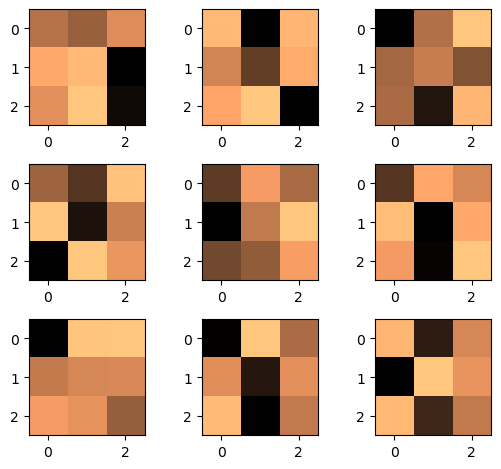

In [262]:
import datetime

Tra = Transition(3,3)

for _ in range(1):
    Tra.gen_state_prob(3, "uniform")
    M = Tra.get_transition_matrix()
    print(M)


print(M)

import numpy as np
from matplotlib import pyplot as plt
"""
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imshow(M, cmap="copper_r")
plt.colorbar(im)
plt.show()
"""
figure, axis = plt.subplots(3, 3)

for i in range(3):
    for j in range(3):
        Tra.gen_state_prob(3, "uniform")
        M = Tra.get_transition_matrix()
        plt.rcParams["figure.autolayout"] = True
        axis[i,j].imshow(M, cmap="copper_r")
        


#axis[0, 1].plot(X, Y2)
#axis[0, 1].set_title("Cosine Function")
plt.savefig("plots/TM-heatmap-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.show()

## Plot State Transition Diagram

In [263]:
'''
import numpy as np
from matplotlib import pyplot as plt

# Import the MarkovChain class from markovchain.py
from markovchain import MarkovChain
P = np.array(transition_matrix)
mc = MarkovChain(P, ['left', 'straight', 'right'])
mc.draw()
'''

"\nimport numpy as np\nfrom matplotlib import pyplot as plt\n\n# Import the MarkovChain class from markovchain.py\nfrom markovchain import MarkovChain\nP = np.array(transition_matrix)\nmc = MarkovChain(P, ['left', 'straight', 'right'])\nmc.draw()\n"

## Simulate Map

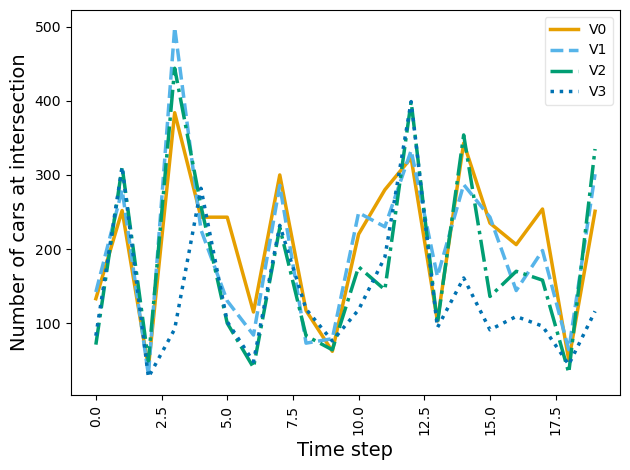

In [264]:
from MarkovProcess import MarkovChain
from Population import Population
from Simulate import Simulate

P = Population(20,0.5,0.5,30)

timeSteps = [10,50,100,150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]
#timeSteps = [10,100,500,1000,1500,2000,2500,3000,3500,4000]
S = Simulate(timeSteps)

S.addCars = True        #add new cars at every time step
S.addActCars = False
S.runSimulation(P)
#S.printMap(False)
S.plotData()
Features, Labels = S.getLearningData()
#print(Labels)
#print(Features)

S.generateTestingData(100)
tFeatures, tLabels = S.getTestingData()
#print(tLabels)
#print(tFeatures)

#override features
#S.generateTestingData(1000)
#Features, Labels = S.getTestingData()

del S

In [265]:
#https://vknight.org/unpeudemath/code/2015/08/01/simulating_continuous_markov_chains.html

## Plot MarkovChain

In [266]:
'''
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   a -> b -> c;
}"""
draw(g1)
'''

'\nimport pygraphviz as pgv\nfrom IPython.display import Image\n\ndef draw(dot):\n    return Image(pgv.AGraph(dot).draw(format=\'png\', prog=\'dot\'))\n\ng1 = """digraph top {\n   a -> b -> c;\n}"""\ndraw(g1)\n'

## Decision Tree Classifier

In [267]:
from sklearn import tree
X = Features
Y = Labels
pLabels = []
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

matched = 0
for i in range(len(tFeatures)):
    #print(clf.predict([tFeatures[i]]),"-->",tLabels[i])
    if clf.predict([tFeatures[i]]) == tLabels[i]:
        matched+=1
    pLabels.append(clf.predict([tFeatures[i]])[0])
        
#print(len(pLabels), len(tLabels))
print("accuracy: ", matched/len(tFeatures))

#clf.predict([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])
#clf.predict_proba([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])

accuracy:  0.44


In [268]:
'''
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("traffic_tree") 
'''

'\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("traffic_tree") \n'

## Logistic Regression

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics

classifier = LogisticRegression()
classifier.fit(Features, Labels)
score = metrics.accuracy_score(Labels, classifier.predict(Features))
print("Accuracy: %f" % score)

Accuracy: 0.515789


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

## Neural Network MLP Classifier

data: 380
labels: 380
[0.38255551269402227, 0.2495217243618786, 0.3679227629440993, 0.7906560493164494, 0.09135557529970216, 0.11798837538384857, 0.06383301008196798, 0.10559163058904143, 0.8305753593289905, 0.5]
[0.04199362164699248, 0.18588995122242802, 0.7721164271305796, 0.35580594909903585, 0.13510943546840146, 0.5090846154325626, 0.20653557513168316, 0.5135059698446678, 0.2799584550236491, 1]
[0.056117623817586997, 0.8184262535391165, 0.12545612264329659, 0.21790189130825016, 0.00835300466372401, 0.7737451040280259, 0.07543001729855489, 0.037210479943191724, 0.8873595027582534, 1]
[0.0726673762522059, 0.6633024088002897, 0.26403021494750456, 0.02361909480870623, 0.4060208537144884, 0.5703600514768056, 0.11338961205121383, 0.3501146529525826, 0.5364957349962037, 1]
[0.3781313075149277, 0.33884710813963514, 0.2830215843454371, 0.45875914751045743, 0.05038079305445063, 0.4908600594350919, 0.7689421568428472, 0.08946591784160868, 0.14159192531554413, 1]

right
right
right
right
left


/Users/haider/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


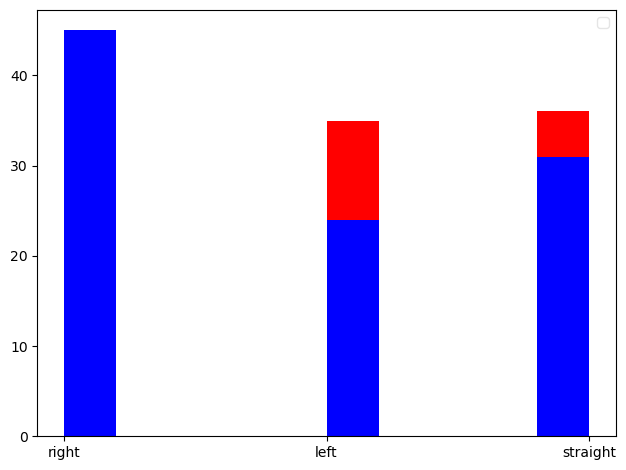

accuracy:  0.5
score: 0.6105263157894737
loss: 0.8447689509022641


In [270]:
from sklearn.neural_network import MLPClassifier
X = Features
y = Labels
MLPpLabels = []
    

print("data:",len(X))
print("labels:",len(y))

[print(X[i]) for i in range(5)] 
print()
[print(y[i]) for i in range(5)] 

clf = MLPClassifier(solver='adam', 
                    alpha=0.00001,
                    #hidden_layer_sizes=(5, 2), 
                    random_state=1,
                    batch_size='auto',
                    early_stopping=False,
                     warm_start=True)

clf.fit(X, y)

matched = 0
lbl = ""
for i in range(len(tFeatures)):
    L = clf.predict([tFeatures[i]])
    if L == tLabels[i]:
        matched+=1
    MLPpLabels.append(L[0])

from matplotlib import pyplot as plt

plt.hist(tLabels, color='r')
plt.hist(MLPpLabels, color='b')
plt.legend()
plt.show()
#print("tLabels", tLabels)
#print("MLPpLabels", MLPpLabels)



print("accuracy: ", matched/len(tFeatures))
print("score:", clf.score(Features, Labels))
print("loss:", clf.loss_)

#clf.predict_proba([[2., 2.], [1., 2.]])

## NN Plot

AttributeError: 'MLPClassifier' object has no attribute 'validation_scores_'

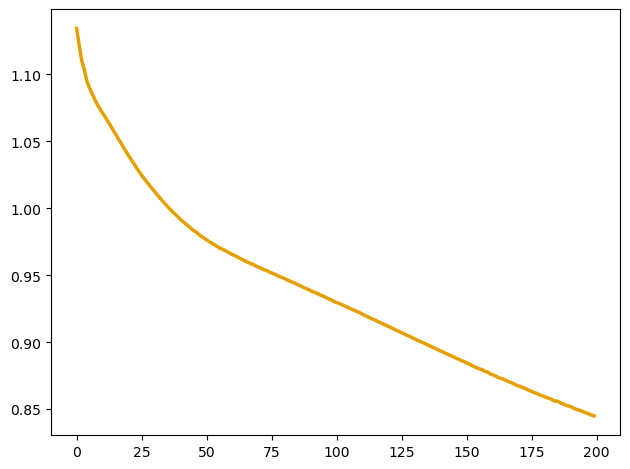

In [273]:
plt.plot(clf.loss_curve_, label="loss")
plt.plot(clf.validation_scores_, label="validation")

plt.legend(True)
plt.show()

## Confusion Matrix

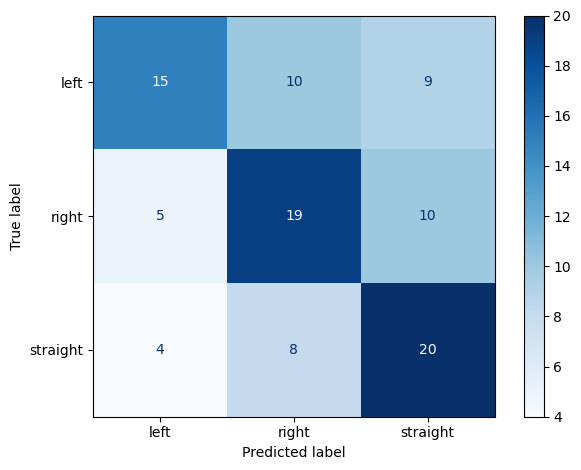

In [ ]:
def labelToNum(lbls):
    temp = []
    for i in lbls:
        if i == 'left': temp.append(0)
        elif i == 'straight': temp.append(0.5)
        elif i == 'right' : temp.append(1)
    return temp

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import datetime

actual = tLabels
predicted = pLabels

#confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=clf.classes_)#["left", "straight", "right"])
confusion_matrix = metrics.confusion_matrix(actual, MLPpLabels, labels=clf.classes_)#["left", "straight", "right"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)#[False, True])

cm_display.plot(cmap = 'Blues')
plt.savefig("plots/confusion-matrix-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.show() 

In [ ]:
#LATEST 01/19